In [1]:
#dependences
import pandas as pd
import numpy as np

#visualizations
import seaborn as sns
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

# statistic tests ans regressions
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu # test for not normally distribution

In [2]:
# Define the path to the CSV file
file = "Resources/uk_gov_data_sparse_preproc.csv"

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(file, encoding="ISO-8859-1")

# Display the first 4 rows of the DataFrame
df_raw.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


### Data Cleanig

In [3]:
# Many null values, we need to investigate
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [4]:
# look at missing value
df_raw.isnull().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           1
fuel                      0
powertrain                0
power_ps                 44
co2_emissions_gPERkm      0
dtype: int64

In [5]:
# look at duplcated value
df_raw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6751    False
6752    False
6753    False
6754    False
6755    False
Length: 6756, dtype: bool

In [6]:
# Locate, Identify, and drop car ID's with an electric transmission (they dont emit co2)
e_transmission_i = df_raw[(df_raw.transmission_type == "Electric - Not Applicable")].index
df_emissions_raw = df_raw.drop(e_transmission_i)
df_emissions_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6654 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6654 non-null   float64
 1   manufacturer          6654 non-null   object 
 2   model                 6654 non-null   object 
 3   description           6654 non-null   object 
 4   transmission          6608 non-null   object 
 5   transmission_type     6654 non-null   object 
 6   engine_size_cm3       6654 non-null   float64
 7   fuel                  6654 non-null   object 
 8   powertrain            6654 non-null   object 
 9   power_ps              6618 non-null   float64
 10  co2_emissions_gPERkm  6654 non-null   float64
dtypes: float64(4), object(7)
memory usage: 623.8+ KB


In [7]:
null_ps = df_emissions_raw[(df_emissions_raw.power_ps == 0)].index
df_emissions = df_emissions_raw.drop(null_ps)
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6642 non-null   float64
 1   manufacturer          6642 non-null   object 
 2   model                 6642 non-null   object 
 3   description           6642 non-null   object 
 4   transmission          6597 non-null   object 
 5   transmission_type     6642 non-null   object 
 6   engine_size_cm3       6642 non-null   float64
 7   fuel                  6642 non-null   object 
 8   powertrain            6642 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6642 non-null   float64
dtypes: float64(4), object(7)
memory usage: 622.7+ KB


In [8]:
df_emissions1 = df_emissions.dropna(subset=["power_ps"])
df_emissions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6606 non-null   float64
 1   manufacturer          6606 non-null   object 
 2   model                 6606 non-null   object 
 3   description           6606 non-null   object 
 4   transmission          6563 non-null   object 
 5   transmission_type     6606 non-null   object 
 6   engine_size_cm3       6606 non-null   float64
 7   fuel                  6606 non-null   object 
 8   powertrain            6606 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6606 non-null   float64
dtypes: float64(4), object(7)
memory usage: 619.3+ KB


In [9]:
null_emissions = df_emissions1[(df_emissions1.co2_emissions_gPERkm == 0)].index
df_emissions_clean = df_emissions1.drop(null_emissions)
df_emissions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6542 non-null   float64
 1   manufacturer          6542 non-null   object 
 2   model                 6542 non-null   object 
 3   description           6542 non-null   object 
 4   transmission          6542 non-null   object 
 5   transmission_type     6542 non-null   object 
 6   engine_size_cm3       6542 non-null   float64
 7   fuel                  6542 non-null   object 
 8   powertrain            6542 non-null   object 
 9   power_ps              6542 non-null   float64
 10  co2_emissions_gPERkm  6542 non-null   float64
dtypes: float64(4), object(7)
memory usage: 613.3+ KB


### Question 1: What is the effect of fuel type on CO2 emissions (g/km)?

### Violin Chart

<Figure size 800x600 with 0 Axes>

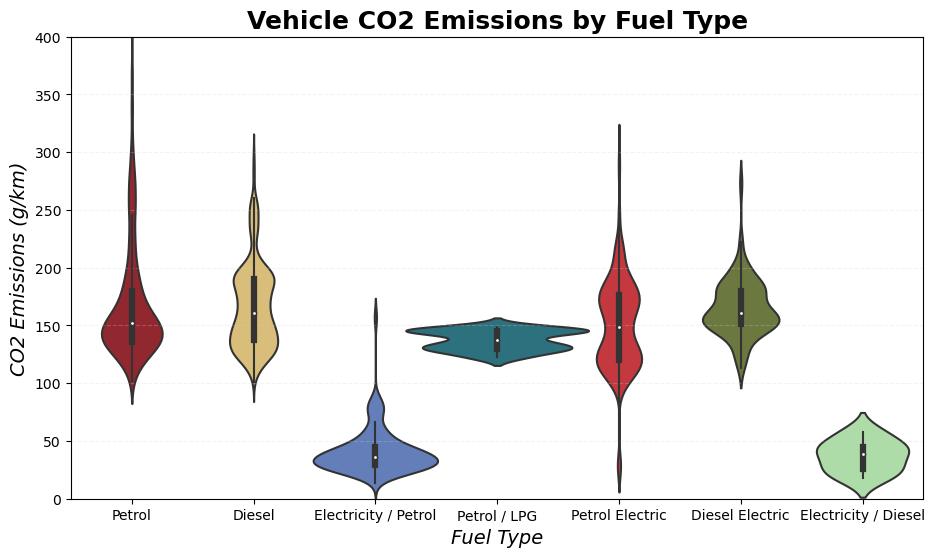

In [10]:
# Step 1: Get the data
data = df_emissions_clean.fuel.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# get the data
data = df_emissions_clean

# create the plot
plt.figure(figsize=(11, 6))
                   
sns.violinplot(data, x="fuel", y="co2_emissions_gPERkm", width=1.5, palette=colors)

# customizations
plt.xlabel("Fuel Type", fontstyle="italic", fontsize=14)
plt.ylabel("CO2 Emissions (g/km)", fontstyle="italic", fontsize=14)
plt.title("Vehicle CO2 Emissions by Fuel Type", fontsize=18, fontweight="bold")
plt.ylim(0, 400)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# save as image file
plt.savefig("output_data/question1violin.png")

plt.show() 
# show
plt.show()

### Bar Chart

In [11]:
# get the data
data = df_emissions_clean

# make a new dataframe
avg_by_fuel_type_df = pd.DataFrame(df_emissions_clean.groupby(["fuel","manufacturer"],as_index=False).agg({'co2_emissions_gPERkm':'mean'}))
print(avg_by_fuel_type_df)

               fuel   manufacturer  co2_emissions_gPERkm
0            Diesel     ALFA ROMEO            158.527778
1            Diesel       CADILLAC            173.500000
2            Diesel  CHRYSLER JEEP            167.880000
3            Diesel        CITROEN            150.826923
4            Diesel          DACIA            133.244186
..              ...            ...                   ...
94  Petrol Electric           SEAT             74.318182
95  Petrol Electric         SUBARU            184.000000
96  Petrol Electric         SUZUKI            120.551724
97  Petrol Electric         TOYOTA            117.489627
98  Petrol Electric          VOLVO            177.994709

[99 rows x 3 columns]


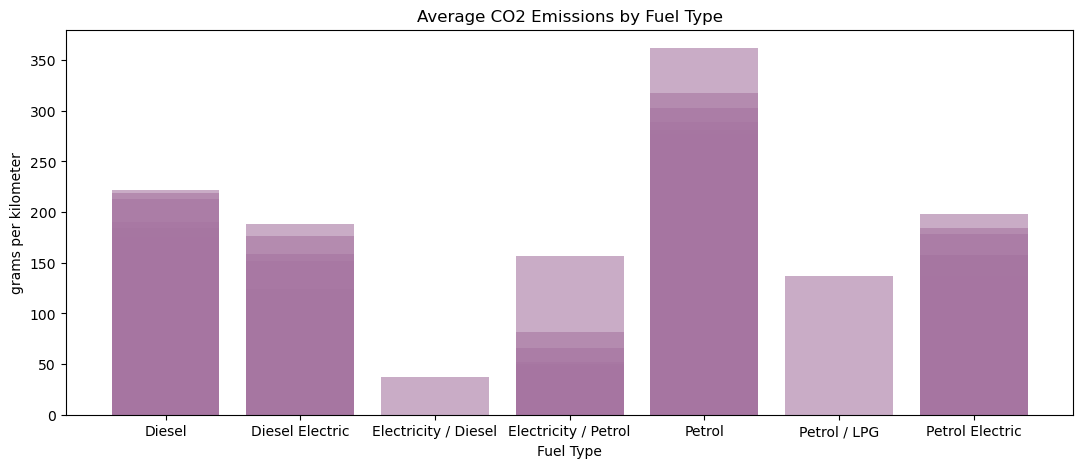

In [12]:
# size the plot
plt.figure(figsize=(13,5))

plt.bar(avg_by_fuel_type_df["fuel"], avg_by_fuel_type_df["co2_emissions_gPERkm"],
                         color='#A675A1', alpha=0.6, align="center")

plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("grams per kilometer")

# save as image file
plt.savefig("output_data/question1bar.png")

plt.show()

### Treemap

In [13]:
import plotly.express as px

In [14]:
fig=px.treemap(avg_by_fuel_type_df, path=['fuel','manufacturer'], values='co2_emissions_gPERkm',color='co2_emissions_gPERkm')
fig.update_layout(
    margin=dict(l=10,r=10,t=50,b=10),
    autosize=False,
    height=800,
    width=1500,
    title=("CO2 Emissions grouped by Fuel Type and Manufacturer")
)
fig.show()

### Question 2: What is the effect of vehicle power (PS) on CO2 emissions (g/km)?

C:\Users\willr\AppData\Local\Temp\ipykernel_37540\2116658533.py:18: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



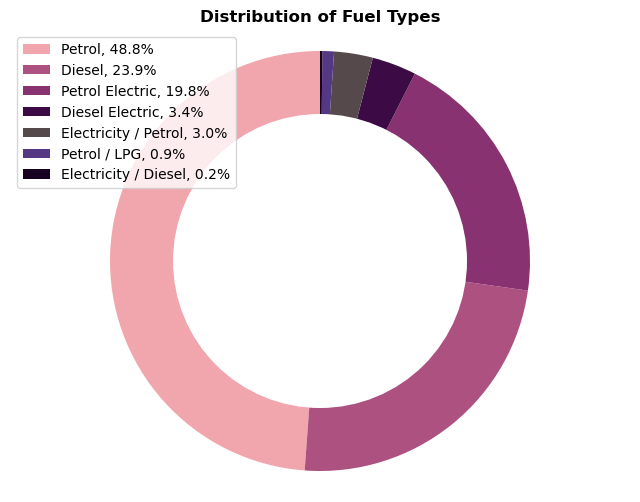

In [15]:
# Step 1: Get the data
data = df_emissions_clean.fuel.value_counts()
colors = ["#F1A5AD", "#AC5180", "#893271", "#3C0A44", "#56494C", "#543884", "#160121"]
# Step 2: Make the canvas
plt.figure(figsize=(8, 6))
# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90,pctdistance=0.85)
# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)
# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()
# Step 4: Customizations
plt.title("Distribution of Fuel Types", fontweight="bold", fontsize=12)
plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.axis("equal")
# Step 5: Save/Show
plt.savefig("output_data/Distribution of Fuel Types.png")
#plt.show()

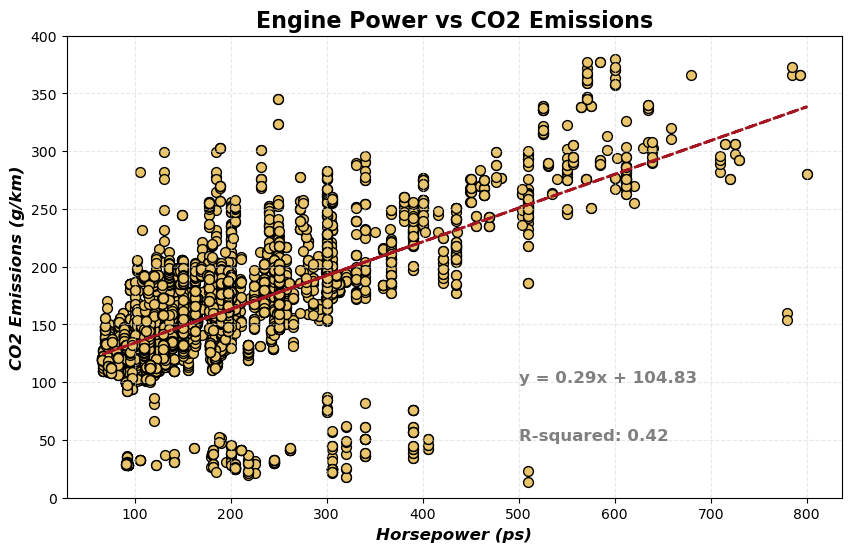

In [16]:
# Define x and y values
x_values = df_emissions_clean.power_ps
y_values = df_emissions_clean.co2_emissions_gPERkm
# Calculate the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create a new plot
plt.figure(figsize=(10, 6))
# Scatter plot with customizations
plt.scatter(x_values, y_values, color="#E9C46A", edgecolor="black", marker="o", s=50)
plt.plot(x_values, regress_values, color="#A31621", linestyle="--", linewidth=2)
# Customizations
plt.xlabel("Horsepower (ps)", fontsize=12, fontstyle="italic",fontweight="bold")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic",fontweight="bold")
plt.title("Engine Power vs CO2 Emissions", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.ylim(0, 400)
# Annotate the line equation
plt.annotate(line_eq, (500, 100), fontsize=12, color="grey",fontweight="bold")
# Display the R-squared value
plt.text(500, 50, f"R-squared: {rvalue**2:.2f}", fontsize=12, color="grey",fontweight="bold")

# Save/Show
plt.savefig("output_data/Engine Power vs CO2 Emissions.png")
# Show the plot
plt.show()

In [17]:
# Create bins for power ranges
power_bins = [1, 100, 200, 300, 400, 500, 600, 700, 800]
power_names = ["1-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800"]

In [18]:
# Add size ranges to DataFrame
df_emissions_clean["power_ranges"] = pd.cut(df_emissions_clean.power_ps,
                                              bins=power_bins, labels=power_names,
                                              include_lowest=True)

In [19]:
# empty lists for later...
emissions_list = []
emissions_summary = []
# for each engine size range...
for e_power in power_names:
    # if the vehicles engine size is in range locate the co2 emissions
    emissions = df_emissions_clean.loc[df_emissions_clean["power_ranges"] == e_power, "co2_emissions_gPERkm"]
    # It is now later. Append emission to a list
    emissions_list.append(emissions)
    # find mean of emissions
    emissions_mean = emissions.mean()
    # list 2: electric boogaloo
    emissions_summary.append(
        {
            "power_range": e_power,
            "emissions_mean": emissions_mean
        }
    )

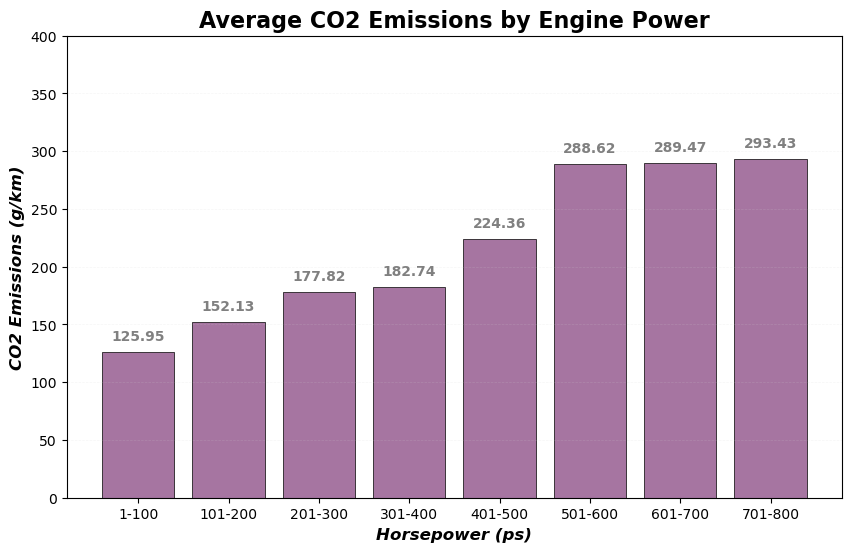

In [20]:
# Get the data
x = pd.DataFrame(emissions_summary)["power_range"]
y = pd.DataFrame(emissions_summary)["emissions_mean"]
# Create the plot
plt.figure(figsize=(10, 6))
# Bar plot with customizations
plt.bar(x, y, color="#A675A1", edgecolor="black", linewidth=0.5)
# Add rounded and bold data labels to the top of each bar
for i, v in enumerate(y):
    plt.text(i, v + 10, str(round(v, 2)), color='grey', ha='center', fontsize=10, fontweight='bold')
# Customizations
plt.xlabel("Horsepower (ps)", fontsize=12, fontstyle="italic", fontweight="bold")  # Make x-axis label bold
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic", fontweight="bold")  # Make y-axis label bold
plt.title("Average CO2 Emissions by Engine Power", fontsize=16, fontweight="bold",color="black")
plt.ylim(0, 400)
# Add grid lines for the y-axis behind the bars
plt.grid(axis="y", color="lightgrey", linestyle="--", linewidth=0.5, alpha=0.2, zorder=0)
# Save/Show
plt.savefig("output_data/Average CO2 Emissions by Engine Power.png")
# Show the plot
plt.show()

### Question 3: What is the effect of transmission type on CO2 emissions (g/km)?

#### Descriptive data 

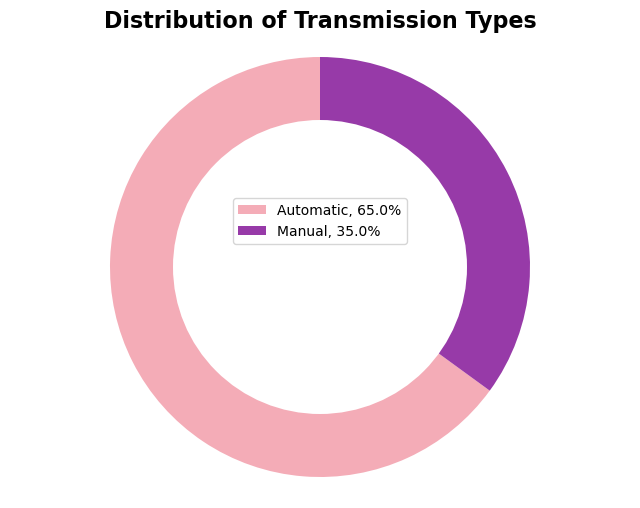

In [21]:
# Step 1: Get the data
data = df_emissions_clean.transmission_type.value_counts()
colors = ["#f4acb7", "#973aa8"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()


# Step 4: Customizations
plt.title("Distribution of Transmission Types", fontweight="bold", fontsize=16)
# plt.legend(handles=patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.6), loc='center', ncol=1,labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)] )

plt.axis("equal")
# Save the figure
plt.savefig("output_data/Distribution of Transmission Types.png")
# Step 5: Save/Show
plt.show()

In [22]:
# Look central tendency
summary_table = df_emissions_clean.groupby('transmission_type')['co2_emissions_gPERkm'].describe()
summary_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] )])
summary_table.round(2)

,count,mean,std,min,25%,50%,75%,max
transmission_type,,,,,,,,
Automatic,4251.0,167.15,55.85,14.0,137.0,163.0,192.0,380.0
Manual,2291.0,145.73,25.82,101.0,129.0,141.0,155.0,284.0


#### Analysis of data distribution

In [23]:
# Identify distribution of data
transmission_types = df_emissions_clean['transmission_type'].unique()
transmission_types

for transmission in transmission_types:
    data = df_emissions_clean[df_emissions_clean['transmission_type'] != transmission]['co2_emissions_gPERkm']
        
        # Test for normality using Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    alpha = 0.05
    if p > alpha:
     print(f"CO2 emissions for {transmission} transmission type are normally distributed")
    else:
     print(f"CO2 emissions for {transmission} transmission type are not normally distributed")

CO2 emissions for Manual transmission type are not normally distributed
CO2 emissions for Automatic transmission type are not normally distributed


#### Test according to distrubtion

In [24]:
# Separate data by transmission type
manual = df_emissions_clean[df_emissions_clean['transmission_type'] == 'Manual']['co2_emissions_gPERkm']
automatic =df_emissions_clean[df_emissions_clean["transmission_type"] == "Automatic"]['co2_emissions_gPERkm']

#### Explore thinking data are normally distributed.

In [25]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    manual = stats.norm.rvs(loc=loc1, size=50, random_state=0)
    automatic = stats.norm.rvs(loc=loc2, size=45, random_state=42)
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(manual )), manual, label="manual ")
    plt.scatter(range(len(automatic)), automatic, label="automatic")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(manual, 10, density=True, alpha=0.7, label="manual ")
    plt.hist(automatic, 10, density=True, alpha=0.7, label="automatic")
    plt.axvline(manual.mean(), color="#f4acb7", linestyle='dashed', linewidth=1)
    plt.axvline(automatic.mean(), color= "#973aa8", linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return manual, automatic

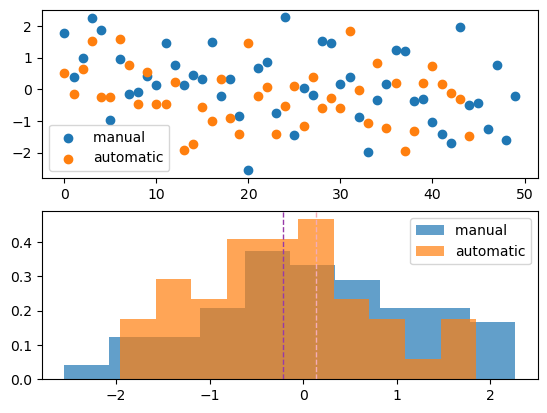

In [26]:
manual, automatic = gendata()

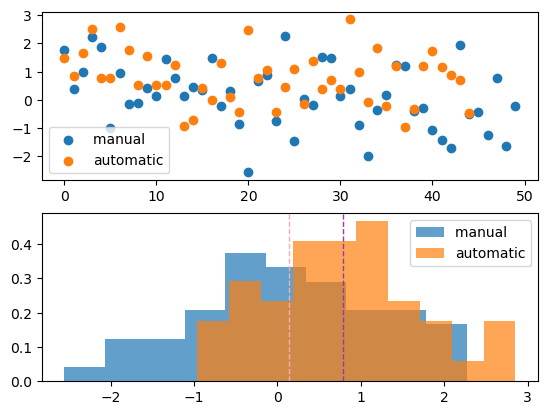

In [27]:
# Generate data with a bigger difference in means
manual, automatic = gendata(loc1=0, loc2=1)

#### The real test stastics according to distrubution

In [28]:
#Mann-Whitney U test: Suitable for comparing the distributions of two independent groups
# Perform Mann-Whitney U test
u_stat, u_p_value = mannwhitneyu(manual, automatic, alternative='two-sided')

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Test Statistic': [u_stat],
    'P-Value': [ u_p_value]
})

# Format numeric values
results['P-Value'] = results['P-Value'].apply(lambda x: '{:.4f}'.format(x))

# Interpret the results
alpha = 0.05
if  u_p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesiss")
# print(f'Mann-Whitney U test: U statistic={u_stat}, p-value={u_p_value}')
# Display the results
print("Mann-Whitney U Test Results:")
print(results)
# Display the customized results
print("Customized Mann-Whitney U Test Results:")
print(results)

Reject the null hypothesis
Mann-Whitney U Test Results:
   Test Statistic P-Value
0           759.0  0.0064
Customized Mann-Whitney U Test Results:
   Test Statistic P-Value
0           759.0  0.0064


In [29]:
u_stat, u_p_value = mannwhitneyu(manual, automatic)
print(f'Mann-Whitney U test: U statistic={u_stat}, p-value={u_p_value}')

Mann-Whitney U test: U statistic=759.0, p-value=0.006444259825933277


#### Visualization

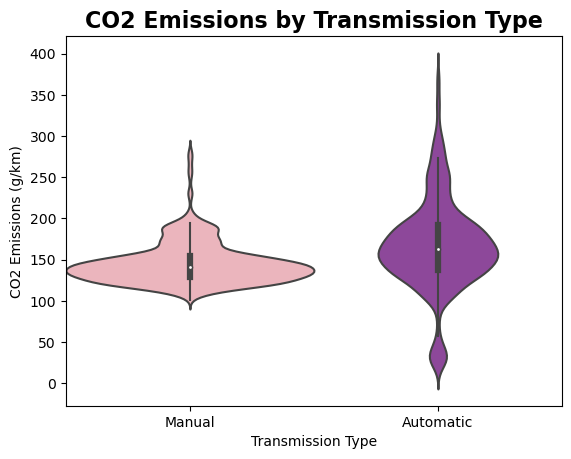

In [30]:
sns.violinplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_emissions_clean,width=1, palette=["#f4acb7","#973aa8"])
plt.title('CO2 Emissions by Transmission Type', fontweight = 'bold', fontsize=16)
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
# Save the figure
plt.savefig("output_data/CO2 Emissions by Transmission Type.png")
plt.show()

### Discussion of Mann-Whitney U test 

#### The test result gives information that there is a highly significant difference in CO2 emissions between manual and automatic transmissions. This implies that the type of transmission has a substantial impact on CO2 emissions. 

### Question 4: What is the effect of engine size (cm^3) on CO2 emissions (g/km)?

y = 0.04x + 81.02


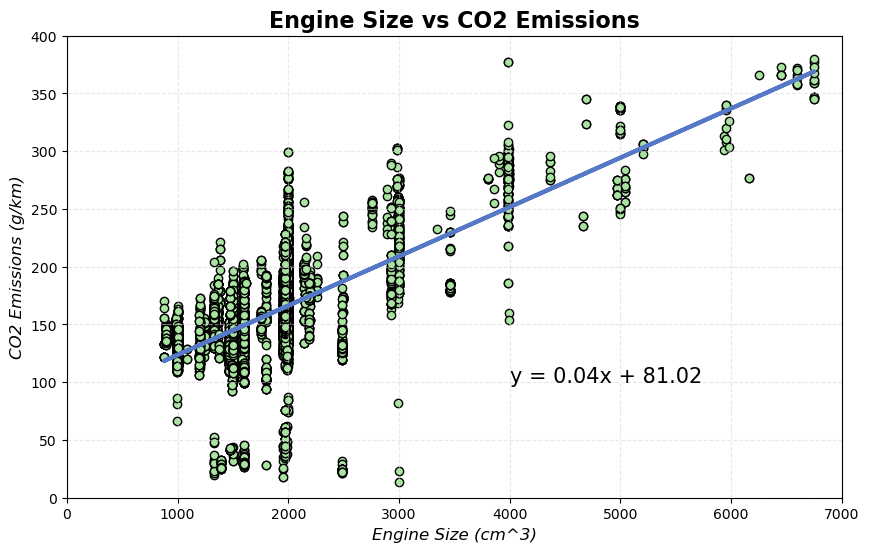

The r-squared is: 0.47182061389139746


In [31]:
x_values = df_emissions_clean.engine_size_cm3
y_values = df_emissions_clean.co2_emissions_gPERkm

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#a8e4a0", edgecolor="black")
plt.plot(x_values, regress_values, "#5579c6", linewidth=3)

# Step 4: Customizations
plt.xlabel("Engine Size (cm^3)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Engine Size vs CO2 Emissions", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(0, 400)
plt.xlim(0, 7000)

plt.annotate(line_eq,(4000, 100),fontsize=15,color="black")
# Save the figure
plt.savefig("output_data/Engine Size vs CO2 Emissions.png")
plt.show() 
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
# Create bins for engine size ranges
size_bins = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
size_names = ["1-1k", "1001-2k", "2001-3k", "3001-4k", "4001-5k", "5001-6k", "6001-7k"]

In [33]:
# Add size ranges to DataFrame
df_emissions_clean["size_ranges"] = pd.cut(df_emissions_clean.engine_size_cm3, 
                                              bins=size_bins, labels=size_names, 
                                              include_lowest=True)

In [34]:
# empty lists for later...
emissions_list = []
emissions_summary = []

# for each engine size range...
for e_size in size_names:
    
    # if the vehicles engine size is in range locate the co2 emissions
    emissions = df_emissions_clean.loc[df_emissions_clean["size_ranges"] == e_size, "co2_emissions_gPERkm"]
    
    # It is now later. Append emission to a list
    emissions_list.append(emissions)
    
    # find mean of emissions
    emissions_mean = emissions.mean()

    # list 2: electric boogaloo
    emissions_summary.append(
        {
            "size_range": e_size,
            "emissions_mean": emissions_mean
        }
    )

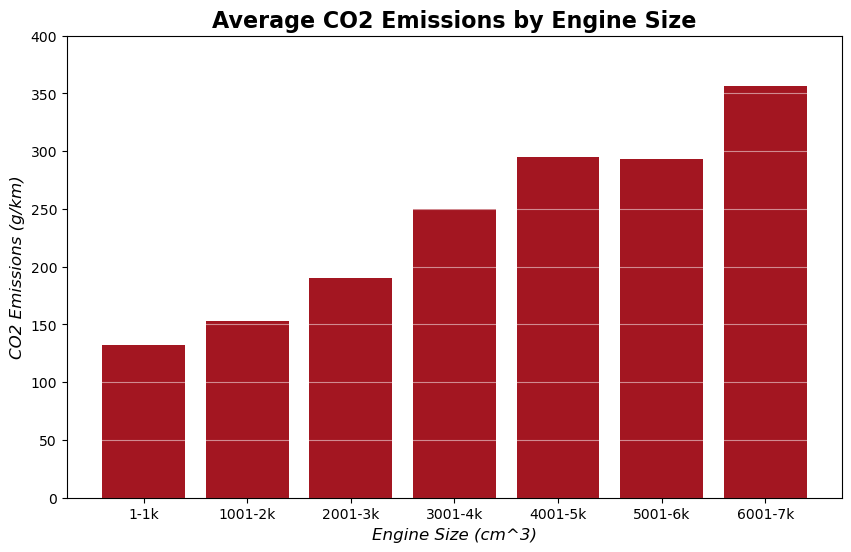

In [35]:
# Create graph
# Step 1: Get the data
x = pd.DataFrame(emissions_summary)["size_range"]
y = pd.DataFrame(emissions_summary)["emissions_mean"]


# Step 2: Create the canvas
plt.figure(figsize=(10,6))

# Step 3: Create the skeleton plot
plt.bar(x, y, color="#a31621")

# Step 4: Customize graph
plt.xlabel("Engine Size (cm^3)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Average CO2 Emissions by Engine Size", fontsize=16, fontweight="bold")
plt.ylim(0, 400)

plt.grid(axis="y", color="white", alpha=0.5)

# Step 5: Show/Save the plot
plt.savefig("output_data/Average CO2 Emissions by Engine Size.png")
plt.show()